In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Intro_to_ML/data/ASA All PGA Raw Data - Tourn Level.csv')


In [3]:
df.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [5]:
column_index = [1,5,6,7,8,9,10,20,21,22,23,24,26,28]
df2 = df.drop(df.columns[column_index], axis = 1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   player id            36864 non-null  int64  
 2   hole_par             36864 non-null  int64  
 3   strokes              36864 non-null  int64  
 4   n_rounds             36864 non-null  int64  
 5   made_cut             36864 non-null  int64  
 6   pos                  21317 non-null  float64
 7   finish_DKP           36864 non-null  int64  
 8   finish_FDP           36864 non-null  int64  
 9   finish_SDP           36864 non-null  int64  
 10  total_DKP            36864 non-null  float64
 11  total_FDP            36864 non-null  float64
 12  total_SDP            36864 non-null  int64  
 13  course               36864 non-null  object 
 14  purse                36864 non-null  float64
 15  no_cut               36864 non-null 

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   player id            36864 non-null  int64  
 2   hole_par             36864 non-null  int64  
 3   strokes              36864 non-null  int64  
 4   n_rounds             36864 non-null  int64  
 5   made_cut             36864 non-null  int64  
 6   pos                  21317 non-null  float64
 7   finish_DKP           36864 non-null  int64  
 8   finish_FDP           36864 non-null  int64  
 9   finish_SDP           36864 non-null  int64  
 10  total_DKP            36864 non-null  float64
 11  total_FDP            36864 non-null  float64
 12  total_SDP            36864 non-null  int64  
 13  course               36864 non-null  object 
 14  purse                36864 non-null  float64
 15  no_cut               36864 non-null 

In [7]:
df2.isna().any()

Player_initial_last    False
player id              False
hole_par               False
strokes                False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
course                 False
purse                  False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott                  True
sg_t2g                  True
sg_total                True
dtype: bool

In [8]:
df2.replace("Nan", np.nan, inplace = True)
df2.dropna(axis = 0,inplace = True)


In [9]:
df2.isna().any()

Player_initial_last    False
player id              False
hole_par               False
strokes                False
n_rounds               False
made_cut               False
pos                    False
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
course                 False
purse                  False
no_cut                 False
Finish                 False
sg_putt                False
sg_arg                 False
sg_app                 False
sg_ott                 False
sg_t2g                 False
sg_total               False
dtype: bool

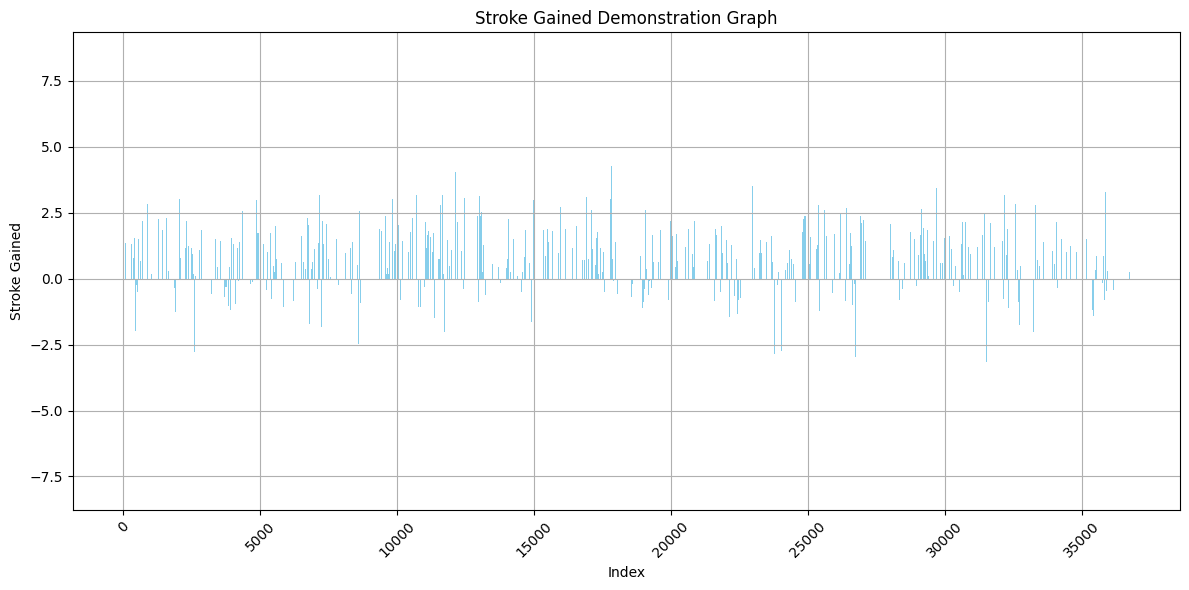

In [10]:
plt.figure(figsize=(12,6))
plt.bar(df2.index, df2['sg_total'],color ='skyblue')
plt.xlabel("Index")
plt.ylabel("Stroke Gained")
plt.title("Stroke Gained Demonstration Graph")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

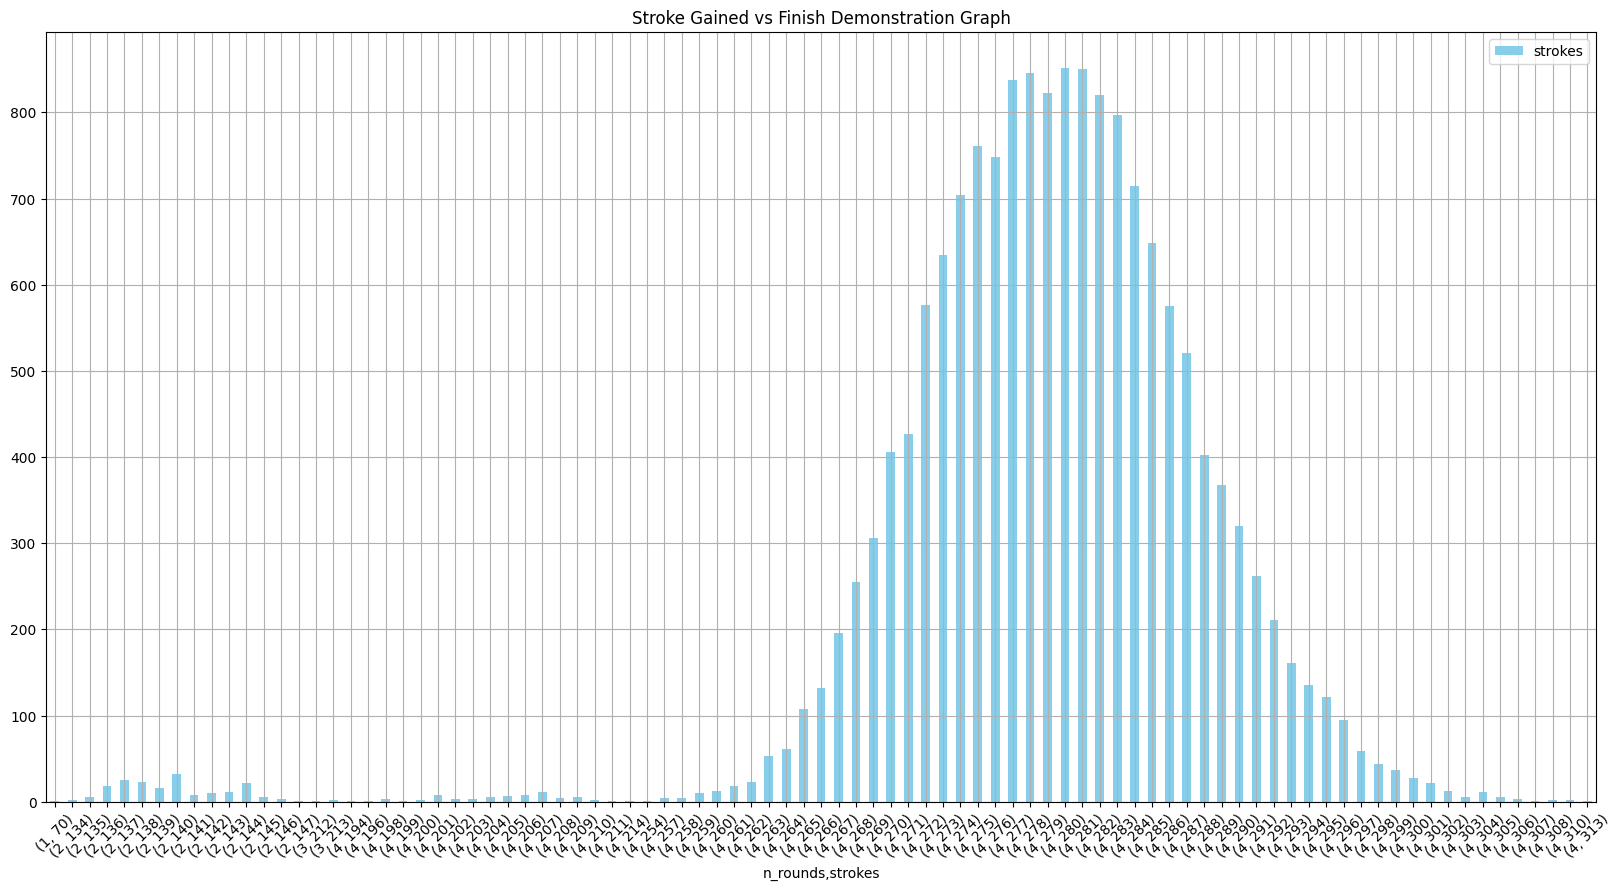

In [13]:
plt.figure(figsize=(20,10))
df2.groupby(['n_rounds', 'strokes']).strokes.count().plot(kind = 'bar', color = 'skyblue')

plt.title("Stroke Gained vs Finish Demonstration Graph")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

#comparison between finish and strokes gains
plt.show()